In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
deaths = pd.read_csv(r"C:\Users\naren\Downloads\WHO-COVID-19-global-data.csv")
deaths['Date_reported']=pd.to_datetime(deaths['Date_reported'])
deaths = deaths[deaths['Date_reported']>='2023-01-01']
deaths = deaths.dropna(subset=['Cumulative_deaths', 'Cumulative_cases'])
population = pd.read_csv(r"C:\Users\naren\Downloads\world_population.csv")
GDP = pd.read_csv(r"C:\Users\naren\Downloads\world_country_gdp_usd.csv")
GDP = GDP
GDP = GDP[GDP['year']==2021]
GDP = GDP.dropna(subset=['GDP_per_capita_USD'])
population= population.dropna(subset=['2022 Population'])

In [3]:
deaths.head()


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1094,2023-01-01,AF,Afghanistan,EMRO,25,207579,0,7849
1095,2023-01-02,AF,Afghanistan,EMRO,6,207585,0,7849
1096,2023-01-03,AF,Afghanistan,EMRO,59,207644,0,7849
1097,2023-01-04,AF,Afghanistan,EMRO,52,207696,1,7850
1098,2023-01-05,AF,Afghanistan,EMRO,18,207714,0,7850


In [4]:
GDP.head()


,Country Name,Country Code,year,GDP_USD,GDP_per_capita_USD
16227,Africa Eastern and Southern,AFE,2021,1.082100e+12,1557.722682
16229,Africa Western and Central,AFW,2021,8.358080e+11,1774.921218
16230,Angola,AGO,2021,7.254699e+10,2137.909393
16231,Albania,ALB,2021,1.826004e+10,6494.385713
16232,Andorra,AND,2021,3.329911e+09,43047.686270


In [5]:
population.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [6]:
country = []
cumulative_deaths = []
cumulative_cases = []
for i in range(len(np.unique(deaths['Country']))):
    country.append(np.unique(deaths['Country'])[i])
    indcountry = (deaths[deaths['Country']==country[i]])
    cumulative_deaths.append(indcountry['Cumulative_deaths'].max())
    cumulative_cases.append(indcountry['Cumulative_cases'].max())

In [7]:
GDP1 = GDP
for i in range(len(np.unique(GDP['Country Name']))):
	if np.unique(GDP['Country Name'])[i] not in np.intersect1d(country,np.unique(population['Country/Territory'])):
		GDP1 = GDP1[GDP1['Country Name']!= np.unique(GDP['Country Name'])[i]]
GDP1 = GDP1.sort_values('Country Name')
GDP1 = GDP1.reset_index()
GDP1.head()

,index,Country Name,Country Code,year,GDP_USD,GDP_per_capita_USD
0,16231,Albania,ALB,2021,1.826004e+10,6494.385713
1,16286,Algeria,DZA,2021,1.679830e+11,3765.034625
2,16232,Andorra,AND,2021,3.329911e+09,43047.686270
3,16230,Angola,AGO,2021,7.254699e+10,2137.909393
4,16238,Antigua and Barbuda,ATG,2021,1.471126e+09,14900.797400


In [8]:
population1 = population
for i in range(len(np.unique(population['Country/Territory']))):
	if np.unique(population['Country/Territory'])[i] not in np.intersect1d(country,np.unique(GDP['Country Name'])):
		population1 = population1[population1['Country/Territory']!= np.unique(population['Country/Territory'])[i]]
population1 = population1.sort_values('Country/Territory')
population1= population1.reset_index()
population1.head()

,index,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
1,2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
2,4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
3,5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
4,7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00


In [9]:
country1 = []
cumulative_deaths1 = []
cumulative_cases1 = []
for i in range(len(country)):
	if np.all(country[i] in np.unique(GDP1['Country Name']) and np.unique(population1['Country/Territory'])):
		country1.append(country[i])
		cumulative_deaths1.append(cumulative_deaths[i])
		cumulative_cases1.append(cumulative_cases[i])
print("Length of GDP1 dataframe: " + str(len(GDP1)) +"\nLength of population1 dataframe: " + str(len(population1)) + "\nLength of country1 list: " + str(len(country1)))

Length of GDP1 dataframe: 151
Length of population1 dataframe: 151
Length of country1 list: 151


In [10]:
deaths_per_thousand_cases = []
cases_per_million_people = []
deaths_per_million_people = []
for i in range(len(country1)):
    deaths_per_thousand_cases.append(cumulative_deaths1[i]/cumulative_cases1[i]*1000)
    cases_per_million_people.append(cumulative_cases1[i]/population1['2022 Population'].to_list()[i]*1000000)
    deaths_per_million_people.append(cumulative_deaths1[i]/population1['2022 Population'].to_list()[i]*1000000)

In [11]:
percountry = pd.DataFrame({'Country':country1, 'Continent':population1['Continent'].to_list(), '2023 Cumulative Deaths':cumulative_deaths1, '2023 Cumulative Cases':cumulative_cases1, '2021 GDP_per_capita_USD':list(GDP1.GDP_per_capita_USD), '2022 Population':population1['2022 Population'].to_list(), 'Deaths Per 1000 Cases':deaths_per_thousand_cases, 'Cases Per Million People':cases_per_million_people, 'Deaths Per Million People':deaths_per_million_people})
percountry.head()

,Country,Continent,2023 Cumulative Deaths,2023 Cumulative Cases,2021 GDP_per_capita_USD,2022 Population,Deaths Per 1000 Cases,Cases Per Million People,Deaths Per Million People
0,Albania,Europe,3598,333400,6494.385713,2842321,10.791842,117298.503582,1265.866874
1,Algeria,Africa,6881,271424,3765.034625,44903225,25.351480,6044.643787,153.240664
2,Andorra,Europe,159,47866,43047.686270,79824,3.321773,599644.217278,1991.882141
3,Angola,Africa,1931,105184,2137.909393,35588987,18.358305,2955.521044,54.258358
4,Antigua and Barbuda,North America,146,9106,14900.797400,93763,16.033385,97117.199748,1557.117413


In [12]:
percountry.describe()

,2023 Cumulative Deaths,2023 Cumulative Cases,2021 GDP_per_capita_USD,2022 Population,Deaths Per 1000 Cases,Cases Per Million People,Deaths Per Million People
count,151.000000,1.510000e+02,151.000000,1.510000e+02,151.000000,151.000000,151.000000
mean,30674.291391,3.476132e+06,16220.438112,4.301408e+07,13.559724,169595.981160,1290.618529
std,83521.078143,1.068545e+07,23954.971068,1.663264e+08,11.274892,184237.441205,1371.788530
min,0.000000,2.779000e+03,236.795414,1.131200e+04,0.000000,362.942931,0.000000
25%,697.000000,6.361250e+04,2114.331427,2.212834e+06,6.114149,12649.141051,130.168703
50%,4336.000000,4.015750e+05,6018.445207,9.038309e+06,11.585960,93120.354882,944.902787
75%,19329.000000,1.931686e+06,17216.351585,2.876312e+07,19.475774,269560.926927,2004.048841
max,698056.000000,9.893269e+07,135682.794300,1.425887e+09,78.558327,656227.218683,6441.898798


<Figure size 640x480 with 0 Axes>

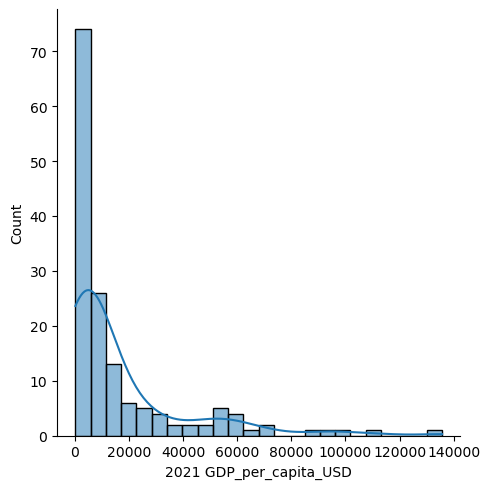

<Figure size 640x480 with 0 Axes>

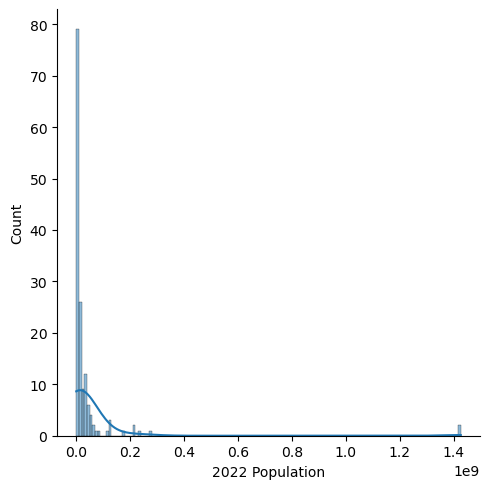

<Figure size 640x480 with 0 Axes>

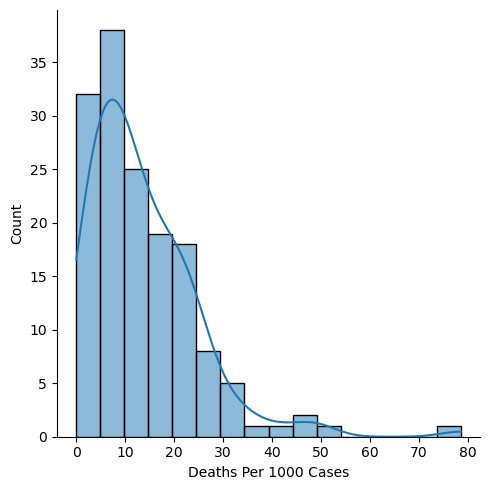

<Figure size 640x480 with 0 Axes>

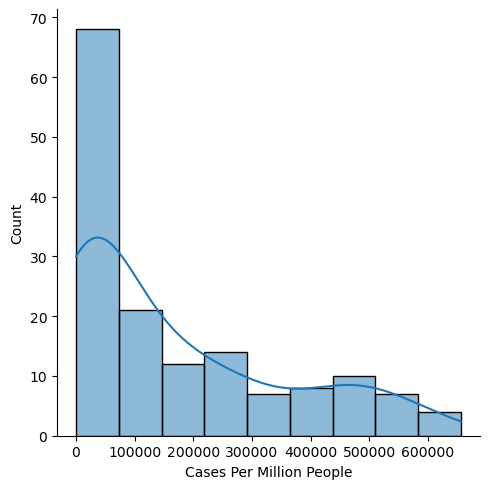

<Figure size 640x480 with 0 Axes>

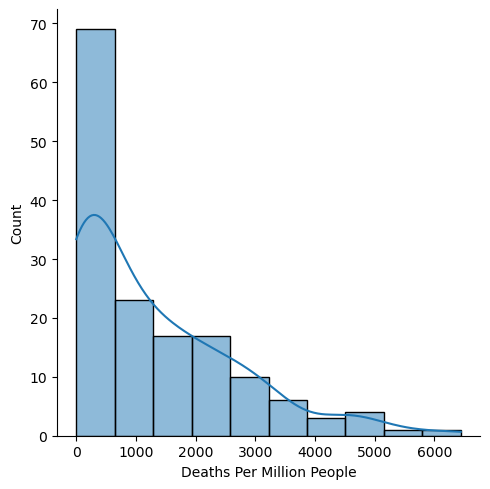

In [13]:
columns = ['2021 GDP_per_capita_USD', '2022 Population', 'Deaths Per 1000 Cases', 'Cases Per Million People', 'Deaths Per Million People']
for i in columns:
    plt.figure()
    sns.displot(percountry[i], kde=True)
plt.show()

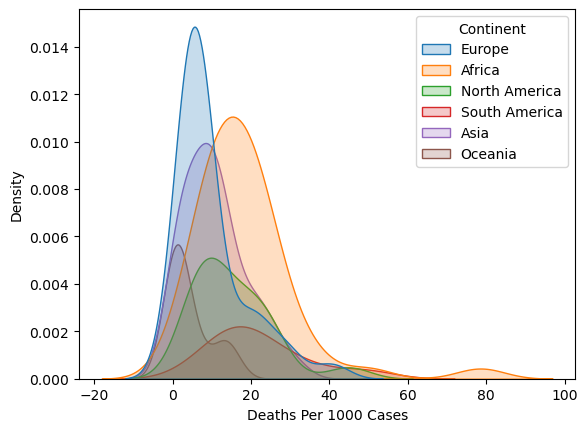

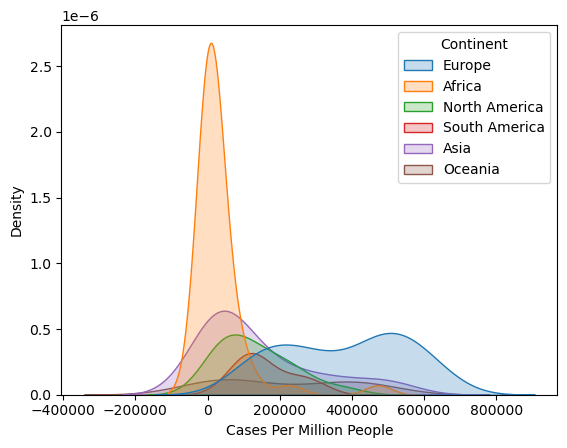

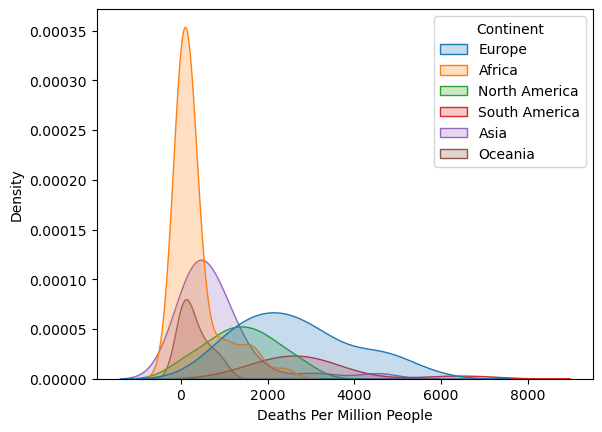

In [14]:
columns = ['Deaths Per 1000 Cases', 'Cases Per Million People', 'Deaths Per Million People']
for i in columns:
    plt.figure()
    sns.kdeplot(percountry[i], shade=True, hue=percountry['Continent'])
plt.show()

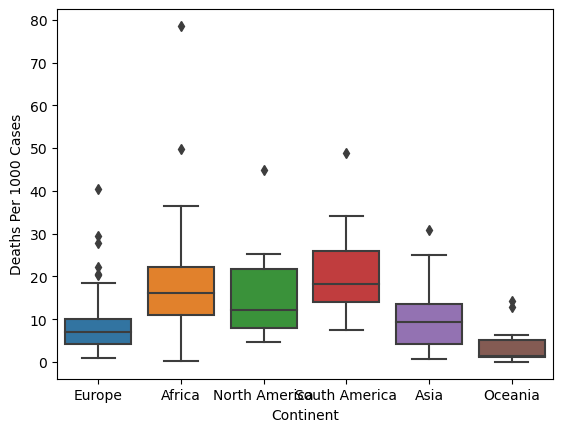

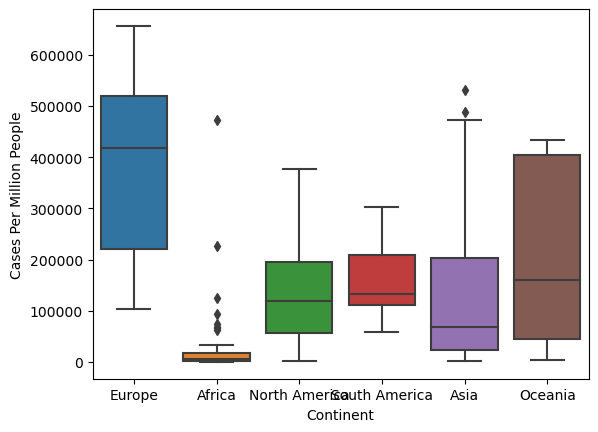

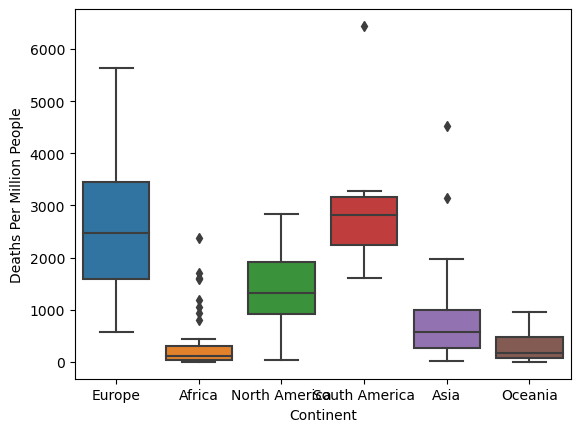

In [15]:
columns = ['Deaths Per 1000 Cases', 'Cases Per Million People', 'Deaths Per Million People']
for i in columns:
    plt.figure()
    sns.boxplot(data = percountry, x='Continent', y = percountry[i])
plt.show()

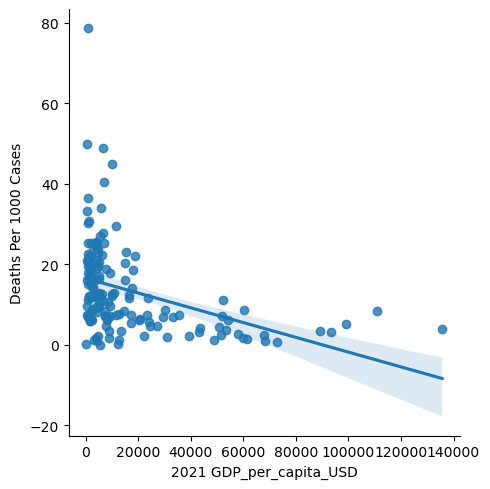

In [16]:
sns.lmplot(data=percountry, x='2021 GDP_per_capita_USD', y='Deaths Per 1000 Cases')
plt.show()

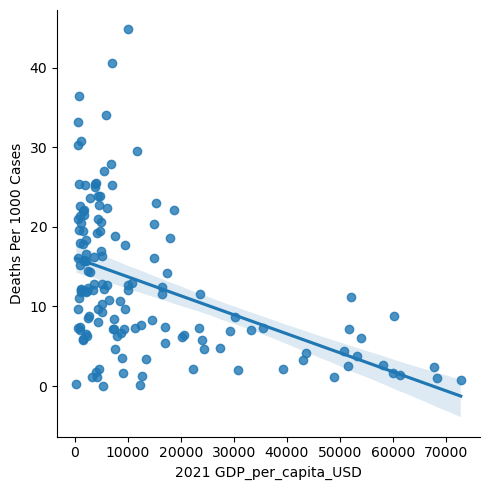

In [17]:
percountry1 = percountry[percountry['2021 GDP_per_capita_USD']<(16220.438112+3*23954.971068)]
percountry1 = percountry1[percountry1['Deaths Per 1000 Cases']<(13.559724+3*11.274892)]
sns.lmplot(data=percountry1, x='2021 GDP_per_capita_USD', y='Deaths Per 1000 Cases')
plt.show()

In [18]:
percountry1.corr()

,2023 Cumulative Deaths,2023 Cumulative Cases,2021 GDP_per_capita_USD,2022 Population,Deaths Per 1000 Cases,Cases Per Million People,Deaths Per Million People
2023 Cumulative Deaths,1.000000,0.595449,0.042535,0.531479,0.145466,0.037556,0.233884
2023 Cumulative Cases,0.595449,1.000000,0.198780,0.787237,-0.157601,0.145671,0.077498
2021 GDP_per_capita_USD,0.042535,0.198780,1.000000,-0.061599,-0.454687,0.711897,0.249399
2022 Population,0.531479,0.787237,-0.061599,1.000000,-0.026438,-0.121374,-0.112807
Deaths Per 1000 Cases,0.145466,-0.157601,-0.454687,-0.026438,1.000000,-0.525935,0.152763
Cases Per Million People,0.037556,0.145671,0.711897,-0.121374,-0.525935,1.000000,0.531872
Deaths Per Million People,0.233884,0.077498,0.249399,-0.112807,0.152763,0.531872,1.000000


In [19]:
clustering1 = KMeans()
clustering1.fit(percountry1[['Deaths Per 1000 Cases']])
percountry1['Death Rate Cluster'] = clustering1.labels_
percountry1.head()

,Country,Continent,2023 Cumulative Deaths,2023 Cumulative Cases,2021 GDP_per_capita_USD,2022 Population,Deaths Per 1000 Cases,Cases Per Million People,Deaths Per Million People,Death Rate Cluster
0,Albania,Europe,3598,333400,6494.385713,2842321,10.791842,117298.503582,1265.866874,4
1,Algeria,Africa,6881,271424,3765.034625,44903225,25.351480,6044.643787,153.240664,7
2,Andorra,Europe,159,47866,43047.686270,79824,3.321773,599644.217278,1991.882141,3
3,Angola,Africa,1931,105184,2137.909393,35588987,18.358305,2955.521044,54.258358,6
4,Antigua and Barbuda,North America,146,9106,14900.797400,93763,16.033385,97117.199748,1557.117413,6


In [20]:
percountry1['Death Rate Cluster'].value_counts()

1    36
3    26
4    25
0    19
6    18
7    11
2     6
5     2
Name: Death Rate Cluster, dtype: int64

In [21]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(percountry1[['Death Rate Cluster']])
    inertia_scores.append(kmeans.inertia_)

C:\Users\naren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\naren\AppData\Local\Temp\ipykernel_9492\3156015815.py:4: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(percountry1[['Death Rate Cluster']])
C:\Users\naren\AppData\Local\Temp\ipykernel_9492\3156015815.py:4: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(percountry1[['Death Rate Cluster']])


In [22]:
inertia_scores

[691.5524475524477,
 194.49938423645318,
 45.361703010130555,
 25.990801695112047,
 13.554438058748403,
 6.675,
 1.8,
 6.611640461883605e-29,
 6.611640461883605e-29,
 4.323943836742671e-29]

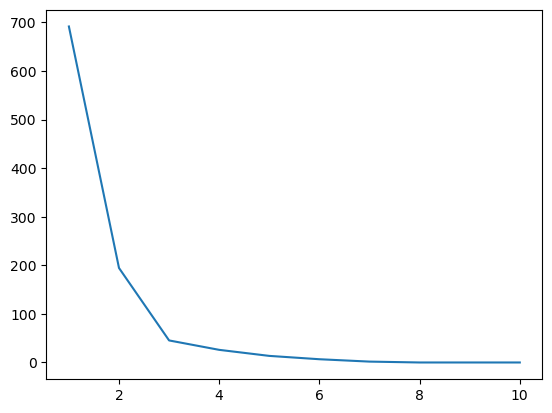

In [23]:
plt.plot(range(1,11),inertia_scores)
plt.show()

In [24]:
clustering2 = KMeans(n_clusters = 3)
clustering2.fit(percountry1[['2021 GDP_per_capita_USD','Deaths Per 1000 Cases']])
percountry1['Death Rate Cluster'] = clustering2.labels_
percountry1.head()

,Country,Continent,2023 Cumulative Deaths,2023 Cumulative Cases,2021 GDP_per_capita_USD,2022 Population,Deaths Per 1000 Cases,Cases Per Million People,Deaths Per Million People,Death Rate Cluster
0,Albania,Europe,3598,333400,6494.385713,2842321,10.791842,117298.503582,1265.866874,0
1,Algeria,Africa,6881,271424,3765.034625,44903225,25.351480,6044.643787,153.240664,0
2,Andorra,Europe,159,47866,43047.686270,79824,3.321773,599644.217278,1991.882141,1
3,Angola,Africa,1931,105184,2137.909393,35588987,18.358305,2955.521044,54.258358,0
4,Antigua and Barbuda,North America,146,9106,14900.797400,93763,16.033385,97117.199748,1557.117413,2


In [25]:
percountry1.groupby('Death Rate Cluster')['Deaths Per 1000 Cases', '2022 Population', '2021 GDP_per_capita_USD'].mean()

C:\Users\naren\AppData\Local\Temp\ipykernel_9492\1264366867.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  percountry1.groupby('Death Rate Cluster')['Deaths Per 1000 Cases', '2022 Population', '2021 GDP_per_capita_USD'].mean()


,Deaths Per 1000 Cases,2022 Population,2021 GDP_per_capita_USD
Death Rate Cluster,,,
0,15.226998,5.617908e+07,4337.145205
1,3.799355,2.470935e+07,55085.032814
2,9.746963,1.130197e+07,21540.880482


In [26]:
percountry1['Death Rate Cluster'].value_counts()

0    101
2     25
1     17
Name: Death Rate Cluster, dtype: int64

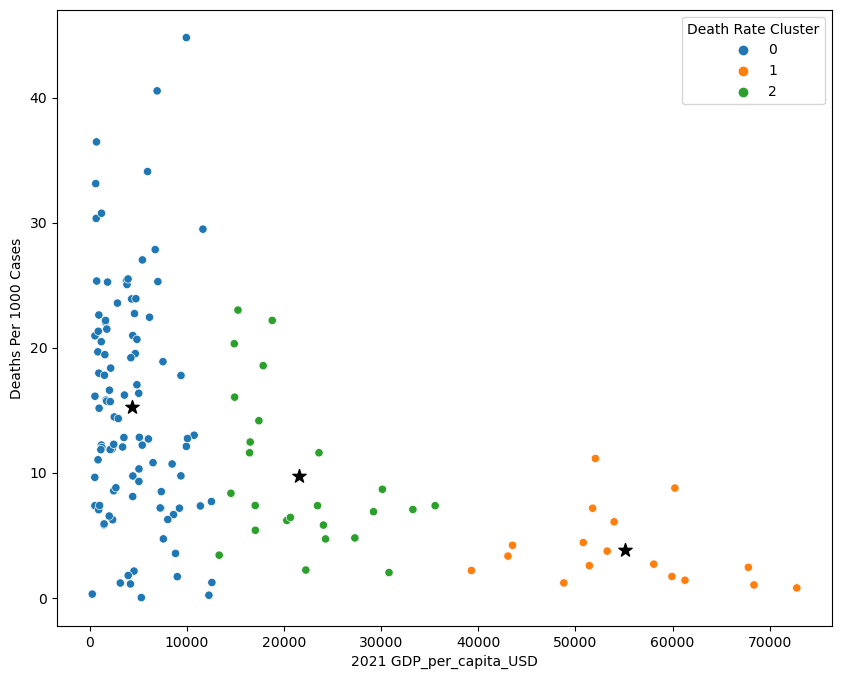

In [27]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=percountry1, x='2021 GDP_per_capita_USD', y='Deaths Per 1000 Cases', hue = 'Death Rate Cluster', palette = 'tab10')
plt.show()